#**Autoencoders (AE)**


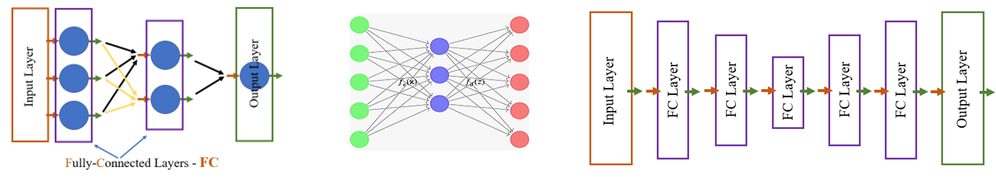

###**iris dataset**

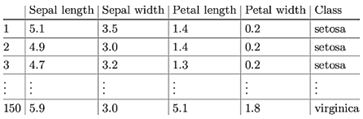

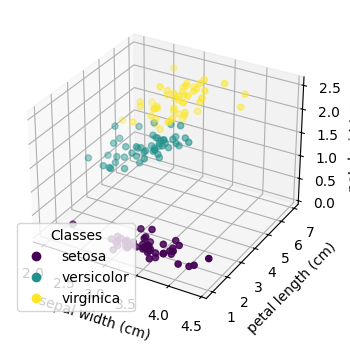

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets



# load iris dataset
iris = datasets.load_iris()

# Create a 3D scatter plot
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(iris.data[:, 1],iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower left", title="Classes"
)

plt.show()

###**Data preprocessing**

main data info:
mean: [3.05733333 3.758      1.19933333]
min: [2.  1.  0.1]
max: [4.4 6.9 2.5]

std data info:
mean: [0.44055556 0.46745763 0.45805556]
min: [0. 0. 0.]
max: [1. 1. 1.]

scaled data info:
mean: [3.05733333 3.758      1.19933333]
min: [2.  1.  0.1]
max: [4.4 6.9 2.5]


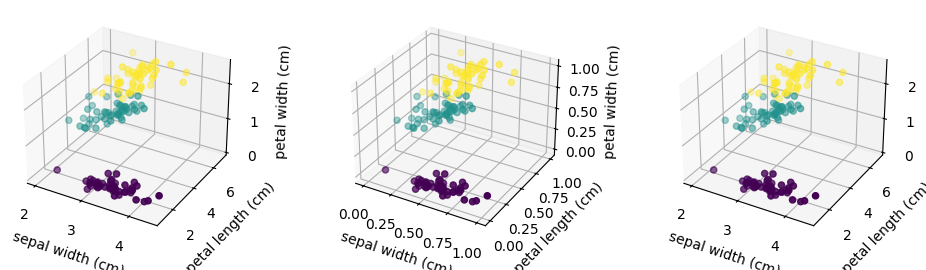

In [ ]:
# load iris dataset
iris = datasets.load_iris()

new_iris = iris.data[:, 1:]
print("main data info:")
print("mean:",new_iris.mean(0))
print("min:",new_iris.min(0))
print("max:",new_iris.max(0))

min,max = new_iris.min(0),new_iris.max(0)
### MinMaxScaler
std_iris = (new_iris - min) / (max - min)
print("\nstd data info:")
print("mean:",std_iris.mean(0))
print("min:",std_iris.min(0))
print("max:",std_iris.max(0))


### MinMaxScaler inverse transform
scaled_iris = std_iris * (max - min) + min
print("\nscaled data info:")
print("mean:",scaled_iris.mean(0))
print("min:",scaled_iris.min(0))
print("max:",scaled_iris.max(0))

# Create a 3D scatter plot
fig = plt.figure(figsize=(12,3))

### Plot 1
ax = fig.add_subplot(131, projection='3d')
scatter = ax.scatter(new_iris[:, 0],new_iris[:, 1], new_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])

### Plot 2
ax = fig.add_subplot(132, projection='3d')
scatter = ax.scatter(std_iris[:, 0],std_iris[:, 1], std_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])

### Plot 3
ax = fig.add_subplot(133, projection='3d')
scatter = ax.scatter(scaled_iris[:, 0],scaled_iris[:, 1], scaled_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])

plt.show()

#**Neural Network Class**

In [ ]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


class NN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # initialize weights randomly
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)

        # initialize biases to 0
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def fit(self, X_data, y_data, batch_size=16, epochs=1000):
        for epoch in range(epochs):
            idxs = np.random.choice(X_data.shape[0],X_data.shape[0],replace=False)
            X_data = X_data[idxs,:]
            y_data = y_data[idxs,:]
            for btch in range(0,X_data.shape[0],batch_size):
                X = X_data[btch:btch+batch_size,:]
                y = y_data[btch:btch+batch_size,:]
                # feedforward
                layer1 = X.dot(self.weights1) + self.bias1
                activation1 = sigmoid(layer1)
                layer2 = activation1.dot(self.weights2) + self.bias2
                activation2 = sigmoid(layer2)

                # backpropagation
                error = activation2 - y
                d_weights2 = activation1.T.dot(error * sigmoid_derivative(layer2))
                d_bias2 = np.sum(error * sigmoid_derivative(layer2), axis=0, keepdims=True)
                error_hidden = error.dot(self.weights2.T) * sigmoid_derivative(layer1)
                d_weights1 = X.T.dot(error_hidden)
                d_bias1 = np.sum(error_hidden, axis=0, keepdims=True)

                # update weights and biases
                self.weights2 -= self.learning_rate * d_weights2
                self.bias2 -= self.learning_rate * d_bias2
                self.weights1 -= self.learning_rate * d_weights1
                self.bias1 -= self.learning_rate * d_bias1

    def predict(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        layer2 = activation1.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return activation2 ##(activation2 > 0.5).astype(int)


    def encode(self, X):
        layer1 = X.dot(self.weights1) + self.bias1
        activation1 = sigmoid(layer1)
        return activation1

    def decode(self, X):
        layer2 = X.dot(self.weights2) + self.bias2
        activation2 = sigmoid(layer2)
        return activation2 ##(activation2 > 0.5).astype(int)


###**Autoencoder and iris data**

In [ ]:
from sklearn.model_selection import train_test_split


X = std_iris
y = std_iris

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("train data:")
for x,y in zip(X_train[:5,:],y_train[:5,:]):
    print("X->",np.round(x,2),"   y->",np.round(y,2))


# create an instance of the NN class
inp_size=X_train.shape[1]
out_size=y_train.shape[1]
nn = NN(input_size=inp_size,
        hidden_size=2,
        output_size=out_size,
        learning_rate=0.1)

# train the NN on the training data
nn.fit(X_train, y_train, batch_size=16,epochs=2000)

# make predictions on the test data
y_pred = nn.predict(X_test)

print("\ntest results:")
for x,y,o in zip(X_test[:5,:],y_test[:5,:],y_pred[:5,:]):
    print("X_test->",np.round(x,2),"  y_test->",np.round(y,2),"  y_pred->",np.round(o,2))

# evaluate error of the AE
err = np.mean(((y_pred - y_test)**2).sum(1))
print(f"\n\ntest error: {err:.2f}")

train data:
X-> [0.67 0.   0.04]    y-> [0.67 0.   0.04]
X-> [1.   0.08 0.13]    y-> [1.   0.08 0.13]
X-> [0.46 0.58 0.54]    y-> [0.46 0.58 0.54]
X-> [0.58 0.1  0.04]    y-> [0.58 0.1  0.04]
X-> [0.5  0.05 0.04]    y-> [0.5  0.05 0.04]

test results:
X_test-> [0.33 0.63 0.46]   y_test-> [0.33 0.63 0.46]   y_pred-> [0.3  0.55 0.51]
X_test-> [0.75 0.12 0.08]   y_test-> [0.75 0.12 0.08]   y_pred-> [0.77 0.09 0.07]
X_test-> [0.25 1.   0.92]   y_test-> [0.25 1.   0.92]   y_pred-> [0.35 0.82 0.83]
X_test-> [0.37 0.59 0.58]   y_test-> [0.37 0.59 0.58]   y_pred-> [0.35 0.63 0.61]
X_test-> [0.33 0.64 0.54]   y_test-> [0.33 0.64 0.54]   y_pred-> [0.31 0.62 0.6 ]


test error: 0.01


###**use trained AE and check error**

std_iris results:
std_iris-> [0.62 0.07 0.04]  std_iris_pred-> [0.64 0.08 0.05]
std_iris-> [0.42 0.07 0.04]  std_iris_pred-> [0.41 0.07 0.04]
std_iris-> [0.5  0.05 0.04]  std_iris_pred-> [0.49 0.07 0.05]
std_iris-> [0.46 0.08 0.04]  std_iris_pred-> [0.45 0.07 0.05]
std_iris-> [0.67 0.07 0.04]  std_iris_pred-> [0.68 0.08 0.06]


std_iris error: 0.01


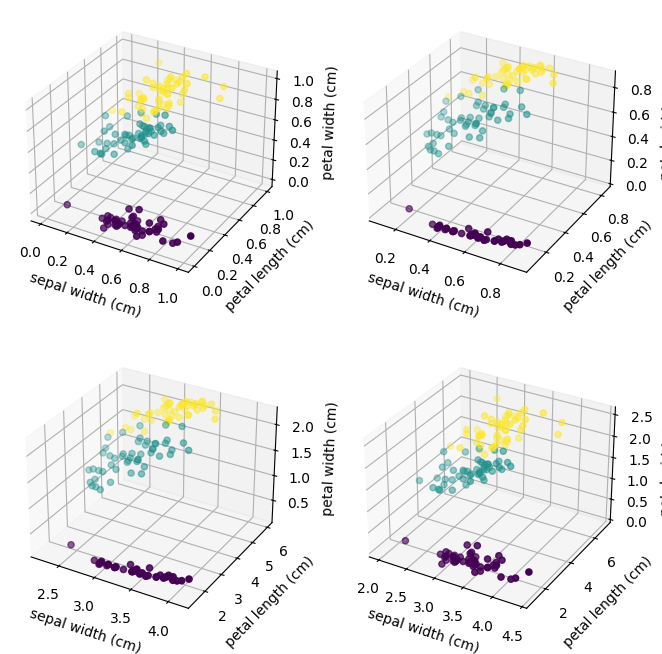

In [ ]:
# make predictions on all data
std_iris_pred = nn.predict(std_iris)

print("std_iris results:")
for x,y in zip(std_iris[:5,:],std_iris_pred[:5,:]):
    print("std_iris->",np.round(x,2)," std_iris_pred->",np.round(y,2))

# evaluate error of the AE
err = np.mean(((std_iris_pred - std_iris)**2).sum(1))
print(f"\n\nstd_iris error: {err:.2f}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(8,8))

### Plot 1
ax = fig.add_subplot(221, projection='3d')
scatter = ax.scatter(std_iris[:, 0],std_iris[:, 1], std_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])


### Plot 2
ax = fig.add_subplot(222, projection='3d')
scatter = ax.scatter(std_iris_pred[:, 0],std_iris_pred[:, 1], std_iris_pred[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])


scaled_iris = std_iris_pred * (max - min) + min
### Plot 3
ax = fig.add_subplot(223, projection='3d')
scatter = ax.scatter(scaled_iris[:, 0],scaled_iris[:, 1], scaled_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])

### Plot 4
ax = fig.add_subplot(224, projection='3d')
scatter = ax.scatter(new_iris[:, 0],new_iris[:, 1], new_iris[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[1], ylabel=iris.feature_names[2],zlabel=iris.feature_names[3])

plt.show()

###**Data Encoding**

In [ ]:
############################################################
### Encoding Data (Also, can be considered asa feature extraction)
############################################################

min,max = new_iris.min(0),new_iris.max(0)
# MinMaxScaler
std_iris = (new_iris - min) / (max - min)
# make encoding on the test data
std_iris_encoded = nn.encode(std_iris)

print("std_iris.shape:",std_iris.shape)
print("std_iris_encoded.shape:",std_iris_encoded.shape)

std_iris.shape: (150, 3)
std_iris_encoded.shape: (150, 2)


###**Model weights are needed to decode data**

In [ ]:
print("weights1.shape:",nn.weights1.shape)
print("bias1.shape:",nn.bias1.shape)


print("weights2.shape:",nn.weights2.shape)
print("bias2.shape:",nn.bias2.shape)

weights1.shape: (3, 2)
bias1.shape: (1, 2)
weights2.shape: (2, 3)
bias2.shape: (1, 3)


###**Data decoding and scaling**

In [ ]:
std_iris_pred = nn.decode(std_iris_encoded)
# evaluate error of the AE
err = np.mean(((std_iris_pred - std_iris)**2).sum(1))
print(f"std_iris error: {err:.2f}")

scaled_iris = std_iris_pred * (max - min) + min
err = np.mean(((scaled_iris - new_iris)**2).sum(1))
print(f"new_iris error: {err:.2f}")

std_iris error: 0.01
new_iris error: 0.11
